# Inverter Sample

```
Copyright 2022 Google LLC.
SPDX-License-Identifier: Apache-2.0
```

This notebook shows how to run a simple inverter design thru an end-to-end RTL to GDSII flow targetting the [SKY130](https://github.com/google/skywater-pdk/) process node.

In [23]:
# %load /openlane/designs/inverter/src/inverter.v
// Copyright 2020 Matt Venn
//
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
//      http://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

`default_nettype none
module inverter (
    input wire in,
    output out );

    assign out = !in;

endmodule


## Run OpenLane flow

[OpenLane](https://github.com/The-OpenROAD-Project/OpenLane) is an automated RTL to GDSII flow based on several components including [OpenROAD](https://github.com/The-OpenROAD-Project/OpenROAD), [Yosys](https://github.com/YosysHQ/yosys), [Magic, Netgen, Fault, CVC, SPEF-Extractor, CU-GR, Klayout and a number of custom scripts for design exploration and optimization.

In [16]:
!flow.tcl -design inverter

[INFO]: 
	 ___   ____   ___  ____   _       ____  ____     ___
	/   \ |    \ /  _]|    \ | |     /    ||    \   /  _]
	|   | |  o  )  [_ |  _  || |    |  o  ||  _  | /  [_
	| O | |   _/    _]|  |  || |___ |     ||  |  ||    _]
	|   | |  | |   [_ |  |  ||     ||  _  ||  |  ||   [_
	\___/ |__| |_____||__|__||_____||__|__||__|__||_____|


[INFO]: Version: N/A
[INFO]: Running non-interactively
[INFO]: Using design configuration at /openlane/designs/inverter/config.tcl
[INFO]: Sourcing Configurations from /openlane/designs/inverter/config.tcl
[INFO]: PDKs root directory: /build/pdk
[INFO]: PDK: sky130A
[INFO]: Setting PDKPATH to /build/pdk/sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library is set to: sky130_fd_sc_hd
[INFO]: Sourcing Configurations from /openlane/designs/inverter/config.tcl
[INFO]: Current run directory is /openlane/designs/inverter/runs/RUN_2022.02.05_18.51.28
[INFO]: Storing configs into config.tcl ...
[INFO]: Preparing LEF Fi

## Display results with GDSII Tool Kit

[Gdstk](https://github.com/heitzmann/gdstk) (GDSII Tool Kit) is a C++/Python library for creation and manipulation of GDSII and OASIS files.

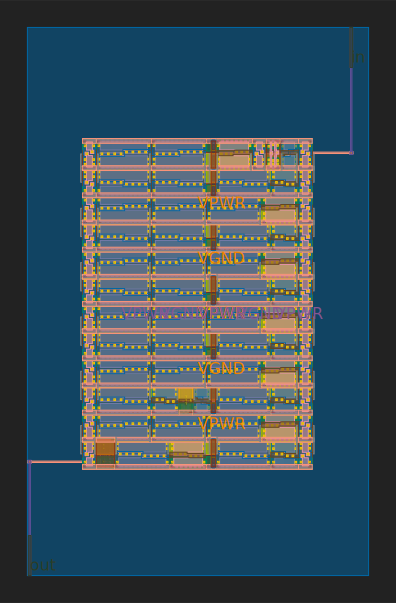

In [15]:
import pathlib
import gdstk
from IPython.display import SVG

gds = sorted(pathlib.Path('/openlane/designs/inverter/runs').glob('*/results/final/gds/*.gds'))[0]
library = gdstk.read_gds(g)
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
SVG('inverter.svg')